In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.metrics import classification_report


In [2]:
mov_df = pd.read_csv("Resources/cleaned_data.csv")


In [3]:
# Bin the score into 4 buckets: less than 4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively.
bins = [0,6,8,10]
labels = [1, 2, 3]
mov_df['binned_score'] = pd.cut(mov_df['imdb_score'], bins=bins, labels=labels)
mov_df.head()

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,binned_score
0,0,Color,James Cameron,723.0,178,949.375628,855.0,Joel David Moore,1000.0,760505847,...,3054,English,USA,PG-13,237000000,2009,936.0,7.9,33000.00000,2
1,1,Color,Gore Verbinski,302.0,169,563.000000,1000.0,Orlando Bloom,40000.0,309404152,...,1238,English,USA,PG-13,300000000,2007,5000.0,7.1,16719.61766,2
2,2,Color,Sam Mendes,602.0,148,949.375628,161.0,Rory Kinnear,11000.0,200074175,...,994,English,UK,PG-13,245000000,2015,393.0,6.8,85000.00000,2
3,3,Color,Christopher Nolan,813.0,164,22000.000000,23000.0,Christian Bale,27000.0,448130642,...,2701,English,USA,PG-13,250000000,2012,23000.0,8.5,164000.00000,3
4,5,Color,Andrew Stanton,462.0,132,475.000000,530.0,Samantha Morton,640.0,73058679,...,738,English,USA,PG-13,263700000,2012,632.0,6.6,24000.00000,2


In [4]:
target = mov_df["binned_score"]
target_names = ["Bad", "Good", "Excellent"]

In [5]:
data = pd.get_dummies(mov_df[["num_critic_for_reviews", "duration", "director_facebook_likes", "actor_3_facebook_likes",
               "actor_1_facebook_likes", "gross","genres", "num_voted_users", "cast_total_facebook_likes", 
               "facenumber_in_poster", "num_user_for_reviews", "content_rating", "budget", "actor_2_facebook_likes",
               "movie_facebook_likes"]])
feature_names = data.columns
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,genres_Mystery|Thriller,genres_Romance|Sci-Fi|Thriller,genres_Sci-Fi|Thriller,genres_Thriller,genres_Western,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
0,723.0,178,949.375628,855.0,1000.0,760505847,886204,4834.0,0.0,3054,...,0,0,0,0,0,0,0,0,1,0
1,302.0,169,563.000000,1000.0,40000.0,309404152,471220,48350.0,0.0,1238,...,0,0,0,0,0,0,0,0,1,0
2,602.0,148,949.375628,161.0,11000.0,200074175,275868,11700.0,1.0,994,...,0,0,0,0,0,0,0,0,1,0
3,813.0,164,22000.000000,23000.0,27000.0,448130642,1144337,106759.0,0.0,2701,...,0,0,0,0,0,0,0,0,1,0
4,462.0,132,475.000000,530.0,640.0,73058679,212204,1873.0,1.0,738,...,0,0,0,0,0,0,0,0,1,0


In [6]:
data_new = pd.get_dummies(mov_df[[ "duration", "director_facebook_likes", "actor_3_facebook_likes",
               "actor_1_facebook_likes", "cast_total_facebook_likes", 
               "facenumber_in_poster", "content_rating", "budget", "actor_2_facebook_likes"]])
feature_names_new = data_new.columns
data_new.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
0,178,949.375628,855.0,1000.0,4834.0,0.0,237000000,936.0,0,0,0,1,0
1,169,563.000000,1000.0,40000.0,48350.0,0.0,300000000,5000.0,0,0,0,1,0
2,148,949.375628,161.0,11000.0,11700.0,1.0,245000000,393.0,0,0,0,1,0
3,164,22000.000000,23000.0,27000.0,106759.0,0.0,250000000,23000.0,0,0,0,1,0
4,132,475.000000,530.0,640.0,1873.0,1.0,263700000,632.0,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_new, target, random_state=42, stratify=target)

In [8]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6785714285714286

In [9]:
clf_new = tree.DecisionTreeClassifier()
clf_new = clf_new.fit(X_train_new, y_train_new)
clf_new.score(X_test_new, y_test_new)

0.5966386554621849

In [10]:
joblib.dump(clf_new, 'Models/decision_tree_simple.pkl')
joblib.dump(clf, 'Models/decision_tree_complex.pkl')

['Models/decision_tree_complex.pkl']

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7783613445378151

In [12]:
rf_new = RandomForestClassifier(n_estimators=200)
rf_new = rf_new.fit(X_train_new, y_train_new)
rf_new.score(X_test_new, y_test_new)

0.717436974789916

In [13]:
joblib.dump(rf, 'Models/rf_complex.pkl')
joblib.dump(rf_new, 'Models/rf_simple.pkl')

['Models/rf_simple.pkl']

In [14]:
# sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [15]:
# sorted(zip(rf_new.feature_importances_, feature_names_new), reverse=True)

In [16]:
predictions_new = rf_new.predict(X_train_new)
print(classification_report(y_train_new, predictions_new,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      1.00      1.00       873
       Good       1.00      1.00      1.00      1863
  Excellent       1.00      1.00      1.00       118

avg / total       1.00      1.00      1.00      2854



k: 1, Train/Test Score: 1.000/0.593
k: 3, Train/Test Score: 0.769/0.584
k: 5, Train/Test Score: 0.725/0.598
k: 7, Train/Test Score: 0.705/0.620
k: 9, Train/Test Score: 0.700/0.642
k: 11, Train/Test Score: 0.691/0.636
k: 13, Train/Test Score: 0.680/0.654
k: 15, Train/Test Score: 0.674/0.644
k: 17, Train/Test Score: 0.674/0.644
k: 19, Train/Test Score: 0.673/0.646


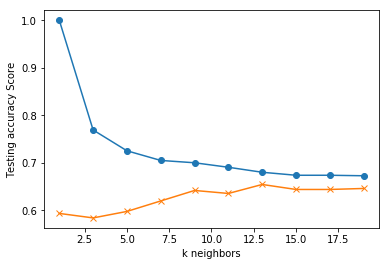

In [17]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.642


k: 1, Train/Test Score: 1.000/0.546
k: 3, Train/Test Score: 0.781/0.590
k: 5, Train/Test Score: 0.723/0.604
k: 7, Train/Test Score: 0.706/0.612
k: 9, Train/Test Score: 0.700/0.610
k: 11, Train/Test Score: 0.694/0.612
k: 13, Train/Test Score: 0.677/0.623
k: 15, Train/Test Score: 0.671/0.629
k: 17, Train/Test Score: 0.672/0.621
k: 19, Train/Test Score: 0.672/0.608


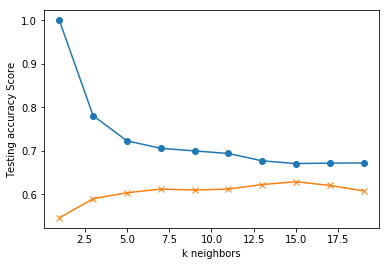

k=15 Test Acc: 0.629


In [19]:
# K Nearest Neighbors

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores_new = []
test_scores_new = []
for k in range(1, 20, 2):
    knn_new = KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(X_train_new, y_train_new)
    train_score_new = knn_new.score(X_train_new, y_train_new)
    test_score_new = knn_new.score(X_test_new, y_test_new)
    train_scores_new.append(train_score_new)
    test_scores_new.append(test_score_new)
    print(f"k: {k}, Train/Test Score: {train_score_new:.3f}/{test_score_new:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores_new, marker='o')
plt.plot(range(1, 20, 2), test_scores_new, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
# Note that k: 9 seems to be the best choice for this dataset
knn_new = KNeighborsClassifier(n_neighbors=15)
knn_new.fit(X_train_new, y_train_new)
print('k=15 Test Acc: %.3f' % knn_new.score(X_test_new, y_test_new))

In [20]:
joblib.dump(knn, 'Models/knn_complex.pkl')
joblib.dump(knn_new, 'Models/knn_simple.pkl')

['Models/knn_simple.pkl']

In [21]:
# SVM
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC()
model.fit(X_train, y_train)

# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.658


In [22]:
# Calculate classification report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      0.02      0.03       291
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.73      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# SVM
# Support vector machine linear classifier
from sklearn.svm import SVC 
model_new = SVC()
model_new.fit(X_train_new, y_train_new)

# Model Accuracy
print('Test Acc: %.3f' % model_new.score(X_test_new, y_test_new))
# Calculate classification report
predictions_new = model_new.predict(X_test_new)
print(classification_report(y_test_new, predictions_new,
                            target_names=target_names))

Test Acc: 0.659
             precision    recall  f1-score   support

        Bad       1.00      0.02      0.04       291
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.73      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
joblib.dump(model, 'Models/svm_complex.pkl')
joblib.dump(model_new, 'Models/svm_simple.pkl')

['Models/svm_simple.pkl']

In [25]:
svm_model = joblib.load('Models/svm_complex.pkl')

In [26]:
predictions = svm_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      0.02      0.03       291
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.73      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
svm_model_new = joblib.load('Models/svm_simple.pkl')

In [28]:
predictions_new = svm_model_new.predict(X_test_new)
print(classification_report(y_test_new, predictions_new,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      0.02      0.04       291
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.73      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
predictions_new = rf_new.predict(X_train_new)
print(classification_report(y_train_new, predictions_new,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      1.00      1.00       873
       Good       1.00      1.00      1.00      1863
  Excellent       1.00      1.00      1.00       118

avg / total       1.00      1.00      1.00      2854

